In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import json




# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)



2024-04-22 12:35:28.788434: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 12:35:28.788472: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Extract patterns and tags
patterns = []
tags = []
responses = []
tag_to_index = {}  # To map tags to numerical values
index_to_tag = {}  # To map numerical values back to tags


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from nltk.corpus import stopwords
import nltk
import json

In [4]:
for i, intent in enumerate(data['intents']):
    tag = intent['tag']
    tag_to_index[tag] = i
    index_to_tag[i] = tag

    # Apply preprocessing: removing stop words
    stop_words = set(stopwords.words('english'))
    cleaned_patterns = [word for word in intent['patterns'] if word.lower() not in stop_words]

    patterns.extend(cleaned_patterns)
    tags.extend([i] * len(cleaned_patterns))  # Use numerical values instead of strings
    responses.extend(intent['responses'])


In [5]:
#for i, intent in enumerate(data['intents']):
#    tag = intent['tag']
#    tag_to_index[tag] = i
#    index_to_tag[i] = tag

#    patterns.extend(intent['patterns'])
 #   tags.extend([i] * len(intent['patterns']))  # Use numerical values instead of strings
#    responses.extend(intent['responses'])

# Print the data
print("tag_to_index:", tag_to_index)
print("index_to_tag:", index_to_tag)
print("patterns:", patterns)
print("tags:", tags)
print("responses:", responses)


tag_to_index: {'wishing': 1, 'responses': 2, 'view_bill': 3, 'change_billing_address': 4, 'upgrade_downgrade_plan': 5, 'current_data_usage': 6, 'check_account_balance': 7, 'add_remove_services': 8, 'internet_not_working': 9, 'call_issues': 10, 'voicemail_setup': 11, 'no_service': 12, 'configure_apn_settings': 13}
index_to_tag: {0: 'wishing', 1: 'wishing', 2: 'responses', 3: 'view_bill', 4: 'change_billing_address', 5: 'upgrade_downgrade_plan', 6: 'current_data_usage', 7: 'check_account_balance', 8: 'add_remove_services', 9: 'internet_not_working', 10: 'call_issues', 11: 'voicemail_setup', 12: 'no_service', 13: 'configure_apn_settings'}
patterns: ['hi', 'how are you ?', 'hello', 'hi', 'how are you ?', 'hello', 'thank you', 'thanks a lot', 'appreciate it', 'How can I view my bill?', 'Where can I see my bill?', 'I need to check my bill, how can I do that?', 'How do I access my billing information?', 'Can you help me find my bill?', 'Where do I go to view my bill?', 'I want to see my bill.

In [6]:
# Tokenize the patterns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(patterns)
total_words = len(tokenizer.word_index) + 1

# Display details
print("Total words after tokenization:", total_words)
print("Word index:", tokenizer.word_index)


Total words after tokenization: 248
Word index: {'my': 1, 'i': 2, 'to': 3, 'how': 4, 'do': 5, 'can': 6, 'what': 7, 'plan': 8, 'the': 9, 'is': 10, 'phone': 11, "what's": 12, 'you': 13, 'billing': 14, 'on': 15, 'for': 16, 'balance': 17, 'voicemail': 18, 'apn': 19, 'address': 20, 'internet': 21, 'services': 22, 'data': 23, "'no": 24, "service'": 25, 'bill': 26, 'should': 27, 'or': 28, 'account': 29, 'where': 30, "i'm": 31, 'steps': 32, 'current': 33, 'it': 34, 'me': 35, 'usage': 36, 'a': 37, 'need': 38, 'help': 39, 'calls': 40, 'find': 41, 'check': 42, 'change': 43, 'there': 44, 'working': 45, 'process': 46, 'upgrade': 47, 'adding': 48, 'removing': 49, 'with': 50, 'fix': 51, 'not': 52, 'up': 53, 'why': 54, 'settings': 55, 'access': 56, 'want': 57, 'take': 58, 'by': 59, 'setup': 60, 'does': 61, 'in': 62, 'update': 63, 'way': 64, 'connection': 65, 'call': 66, 'are': 67, 'guide': 68, 'procedure': 69, 'from': 70, 'if': 71, 'making': 72, 'receiving': 73, 'see': 74, 'that': 75, 'information': 7

In [7]:

# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)

# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)


In [8]:
# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)
# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)
# Display information about the training data
print("Input sequences:")
for seq in input_sequences:
    print(seq)

print("\nInput padded sequences:")
print(input_padded)

print("\nLabels (one-hot encoding):")
print(labels)


Input sequences:
[125]
[4, 67, 13]
[126]
[125]
[4, 67, 13]
[126]
[161, 13]
[162, 37, 163]
[164, 34]
[4, 6, 2, 84, 1, 26]
[30, 6, 2, 74, 1, 26]
[2, 38, 3, 42, 1, 26, 4, 6, 2, 5, 75]
[4, 5, 2, 56, 1, 14, 76]
[6, 13, 39, 35, 41, 1, 26]
[30, 5, 2, 85, 3, 84, 1, 26]
[2, 57, 3, 74, 1, 26, 7, 27, 2, 5]
[12, 9, 46, 16, 102, 1, 26]
[6, 13, 68, 35, 15, 4, 3, 42, 1, 26]
[31, 127, 16, 1, 26, 30, 5, 2, 41, 34]
[4, 6, 2, 56, 1, 14, 165]
[7, 32, 5, 2, 58, 3, 84, 1, 26]
[30, 5, 2, 41, 1, 14, 103]
[166, 13, 128, 35, 62, 167, 1, 26]
[31, 168, 3, 41, 1, 26, 86, 129]
[30, 6, 2, 56, 1, 169, 14, 76]
[12, 9, 69, 16, 102, 1, 26]
[4, 5, 2, 104, 3, 1, 26]
[31, 87, 62, 130, 1, 26, 12, 9, 46]
[12, 9, 170, 16, 102, 1, 26]
[6, 2, 63, 1, 14, 20]
[4, 5, 2, 43, 1, 14, 20]
[10, 34, 77, 3, 78, 1, 14, 20]
[30, 6, 2, 63, 1, 14, 20]
[6, 2, 43, 9, 20, 15, 1, 26]
[4, 5, 2, 105, 1, 14, 20]
[2, 38, 3, 43, 1, 14, 20, 4, 6, 2, 5, 75]
[12, 9, 46, 16, 131, 1, 14, 20]
[6, 13, 68, 35, 15, 4, 3, 63, 1, 14, 20]
[2, 57, 3, 63, 9, 14, 2

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define your LSTM model without bidirectional layers
model = Sequential([
    Embedding(total_words, 64, input_length=input_padded.shape[1]),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(data['intents']), activation='softmax')
])

# Compile the model

In [11]:


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(input_padded, labels, epochs=1000)

# Save the model
model.save('chatbot_model.h5')


2024-04-22 12:37:25.567821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-22 12:37:25.568396: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494195000 Hz


Epoch 1/1000
8/8 [==============================] - 4s 36ms/step - loss: 2.6336 - accuracy: 0.0873
Epoch 2/1000
8/8 [==============================] - 0s 37ms/step - loss: 2.6282 - accuracy: 0.0917
Epoch 3/1000
8/8 [==============================] - 0s 35ms/step - loss: 2.5986 - accuracy: 0.0961
Epoch 4/1000
8/8 [==============================] - 0s 36ms/step - loss: 2.5766 - accuracy: 0.1135
Epoch 5/1000
8/8 [==============================] - 0s 40ms/step - loss: 2.5415 - accuracy: 0.0961
Epoch 6/1000
8/8 [==============================] - 0s 37ms/step - loss: 2.4492 - accuracy: 0.2140
Epoch 7/1000
8/8 [==============================] - 0s 33ms/step - loss: 2.3844 - accuracy: 0.1703
Epoch 8/1000
8/8 [==============================] - 0s 33ms/step - loss: 2.2680 - accuracy: 0.2227
Epoch 9/1000
8/8 [==============================] - 0s 37ms/step - loss: 2.2563 - accuracy: 0.2445
Epoch 10/1000
8/8 [==============================] - 0s 36ms/step - loss: 2.0781 - accuracy: 0.2795
Epoch 11/

8/8 [==============================] - 0s 37ms/step - loss: 0.0602 - accuracy: 0.9869
Epoch 84/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0447 - accuracy: 0.9913
Epoch 85/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0495 - accuracy: 0.9782
Epoch 86/1000
8/8 [==============================] - 0s 41ms/step - loss: 0.0499 - accuracy: 0.9869
Epoch 87/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0532 - accuracy: 0.9825
Epoch 88/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0483 - accuracy: 0.9825
Epoch 89/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0447 - accuracy: 0.9782
Epoch 90/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0433 - accuracy: 0.9913
Epoch 91/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0455 - accuracy: 0.9869
Epoch 92/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0484 - accuracy: 0.9869
Epoch 93/1000


8/8 [==============================] - 0s 35ms/step - loss: 0.0354 - accuracy: 0.9782
Epoch 165/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0405 - accuracy: 0.9825
Epoch 166/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0437 - accuracy: 0.9782
Epoch 167/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0324 - accuracy: 0.9825
Epoch 168/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0339 - accuracy: 0.9782
Epoch 169/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0319 - accuracy: 0.9913
Epoch 170/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0367 - accuracy: 0.9869
Epoch 171/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0453 - accuracy: 0.9825
Epoch 172/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0362 - accuracy: 0.9869
Epoch 173/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0369 - accuracy: 0.9825
Epoch

8/8 [==============================] - 0s 33ms/step - loss: 0.0262 - accuracy: 0.9869
Epoch 246/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0254 - accuracy: 0.9782
Epoch 247/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0245 - accuracy: 0.9913
Epoch 248/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0208 - accuracy: 0.9913
Epoch 249/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0293 - accuracy: 0.9825
Epoch 250/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0256 - accuracy: 0.9869
Epoch 251/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 252/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0254 - accuracy: 0.9869
Epoch 253/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0337 - accuracy: 0.9825
Epoch 254/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0272 - accuracy: 0.9869
Epoch

8/8 [==============================] - 0s 35ms/step - loss: 0.0308 - accuracy: 0.9738
Epoch 327/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0286 - accuracy: 0.9782
Epoch 328/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0215 - accuracy: 0.9869
Epoch 329/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0242 - accuracy: 0.9825
Epoch 330/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 331/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0261 - accuracy: 0.9869
Epoch 332/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0252 - accuracy: 0.9869
Epoch 333/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0197 - accuracy: 0.9913
Epoch 334/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0260 - accuracy: 0.9869
Epoch 335/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0225 - accuracy: 0.9869
Epoch

8/8 [==============================] - 0s 53ms/step - loss: 0.0255 - accuracy: 0.9825
Epoch 408/1000
8/8 [==============================] - 0s 56ms/step - loss: 0.0196 - accuracy: 0.9825
Epoch 409/1000
8/8 [==============================] - 1s 79ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 410/1000
8/8 [==============================] - 0s 42ms/step - loss: 0.0305 - accuracy: 0.9782
Epoch 411/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0282 - accuracy: 0.9825
Epoch 412/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0246 - accuracy: 0.9825
Epoch 413/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.0255 - accuracy: 0.9869
Epoch 414/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0203 - accuracy: 0.9825
Epoch 415/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0249 - accuracy: 0.9825
Epoch 416/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0268 - accuracy: 0.9825
Epoch

8/8 [==============================] - 0s 30ms/step - loss: 0.0246 - accuracy: 0.9913
Epoch 489/1000
8/8 [==============================] - 0s 31ms/step - loss: 0.0247 - accuracy: 0.9869
Epoch 490/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0215 - accuracy: 0.9869
Epoch 491/1000
8/8 [==============================] - 0s 32ms/step - loss: 0.0176 - accuracy: 0.9956
Epoch 492/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0294 - accuracy: 0.9825
Epoch 493/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0210 - accuracy: 0.9913
Epoch 494/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0179 - accuracy: 0.9869
Epoch 495/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0193 - accuracy: 0.9913
Epoch 496/1000
8/8 [==============================] - 0s 35ms/step - loss: 0.0267 - accuracy: 0.9782
Epoch 497/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0217 - accuracy: 0.9869
Epoch

8/8 [==============================] - 0s 33ms/step - loss: 0.0227 - accuracy: 0.9913
Epoch 570/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0202 - accuracy: 0.9913
Epoch 571/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0201 - accuracy: 0.9825
Epoch 572/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0227 - accuracy: 0.9869
Epoch 573/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0240 - accuracy: 0.9738
Epoch 574/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0207 - accuracy: 0.9782
Epoch 575/1000
8/8 [==============================] - 0s 33ms/step - loss: 0.0203 - accuracy: 0.9913
Epoch 576/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.0209 - accuracy: 0.9956
Epoch 577/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0319 - accuracy: 0.9694
Epoch 578/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.2936 - accuracy: 0.9651
Epoch

8/8 [==============================] - 1s 62ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 651/1000
8/8 [==============================] - 0s 62ms/step - loss: 0.0229 - accuracy: 0.9825
Epoch 652/1000
8/8 [==============================] - 1s 93ms/step - loss: 0.0212 - accuracy: 0.9782
Epoch 653/1000
8/8 [==============================] - 1s 81ms/step - loss: 0.0235 - accuracy: 0.9782
Epoch 654/1000
8/8 [==============================] - 0s 60ms/step - loss: 0.0223 - accuracy: 0.9913
Epoch 655/1000
8/8 [==============================] - 1s 79ms/step - loss: 0.0246 - accuracy: 0.9869
Epoch 656/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.0200 - accuracy: 0.9869
Epoch 657/1000
8/8 [==============================] - 1s 74ms/step - loss: 0.0194 - accuracy: 0.9869
Epoch 658/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.0252 - accuracy: 0.9913
Epoch 659/1000
8/8 [==============================] - 1s 74ms/step - loss: 0.0210 - accuracy: 0.9913
Epoch

8/8 [==============================] - 0s 35ms/step - loss: 0.0200 - accuracy: 0.9913
Epoch 732/1000
8/8 [==============================] - 0s 40ms/step - loss: 0.0259 - accuracy: 0.9825
Epoch 733/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0192 - accuracy: 0.9913
Epoch 734/1000
8/8 [==============================] - 0s 37ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 735/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 736/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0256 - accuracy: 0.9825
Epoch 737/1000
8/8 [==============================] - 0s 39ms/step - loss: 0.0239 - accuracy: 0.9825
Epoch 738/1000
8/8 [==============================] - 0s 43ms/step - loss: 0.0196 - accuracy: 0.9869
Epoch 739/1000
8/8 [==============================] - 0s 48ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 740/1000
8/8 [==============================] - 0s 34ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch

8/8 [==============================] - 1s 110ms/step - loss: 0.0216 - accuracy: 0.9869
Epoch 813/1000
8/8 [==============================] - 1s 99ms/step - loss: 0.0204 - accuracy: 0.9869
Epoch 814/1000
8/8 [==============================] - 1s 96ms/step - loss: 0.0196 - accuracy: 0.9869
Epoch 815/1000
8/8 [==============================] - 1s 108ms/step - loss: 0.0183 - accuracy: 0.9913
Epoch 816/1000
8/8 [==============================] - 1s 97ms/step - loss: 0.0205 - accuracy: 0.9869
Epoch 817/1000
8/8 [==============================] - 1s 91ms/step - loss: 0.0223 - accuracy: 0.9825
Epoch 818/1000
8/8 [==============================] - 1s 100ms/step - loss: 0.0212 - accuracy: 0.9825
Epoch 819/1000
8/8 [==============================] - 1s 82ms/step - loss: 0.0174 - accuracy: 0.9913
Epoch 820/1000
8/8 [==============================] - 1s 97ms/step - loss: 0.0185 - accuracy: 0.9913
Epoch 821/1000
8/8 [==============================] - 1s 88ms/step - loss: 0.0229 - accuracy: 0.9825
Ep

Epoch 893/1000
8/8 [==============================] - 1s 103ms/step - loss: 0.0256 - accuracy: 0.9913
Epoch 894/1000
8/8 [==============================] - 1s 96ms/step - loss: 0.0254 - accuracy: 0.9869
Epoch 895/1000
8/8 [==============================] - 1s 106ms/step - loss: 0.0218 - accuracy: 0.9825
Epoch 896/1000
8/8 [==============================] - 1s 91ms/step - loss: 0.0233 - accuracy: 0.9825
Epoch 897/1000
8/8 [==============================] - 1s 84ms/step - loss: 0.0229 - accuracy: 0.9913
Epoch 898/1000
8/8 [==============================] - 1s 82ms/step - loss: 0.0223 - accuracy: 0.9913
Epoch 899/1000
8/8 [==============================] - 1s 88ms/step - loss: 0.0322 - accuracy: 0.9738
Epoch 900/1000
8/8 [==============================] - 1s 98ms/step - loss: 0.0214 - accuracy: 0.9913
Epoch 901/1000
8/8 [==============================] - 1s 88ms/step - loss: 0.0248 - accuracy: 0.9956
Epoch 902/1000
8/8 [==============================] - 1s 186ms/step - loss: 0.0178 - accu

8/8 [==============================] - 1s 81ms/step - loss: 0.0194 - accuracy: 0.9869
Epoch 974/1000
8/8 [==============================] - 1s 85ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 975/1000
8/8 [==============================] - 1s 99ms/step - loss: 0.0213 - accuracy: 0.9782
Epoch 976/1000
8/8 [==============================] - 1s 154ms/step - loss: 0.0195 - accuracy: 0.9869
Epoch 977/1000
8/8 [==============================] - 1s 126ms/step - loss: 0.0184 - accuracy: 0.9869
Epoch 978/1000
8/8 [==============================] - 1s 96ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 979/1000
8/8 [==============================] - 1s 93ms/step - loss: 0.0190 - accuracy: 0.9913
Epoch 980/1000
8/8 [==============================] - 1s 130ms/step - loss: 0.0190 - accuracy: 0.9825
Epoch 981/1000
8/8 [==============================] - 1s 163ms/step - loss: 0.0227 - accuracy: 0.9869
Epoch 982/1000
8/8 [==============================] - 1s 175ms/step - loss: 0.0193 - accuracy: 0.9869


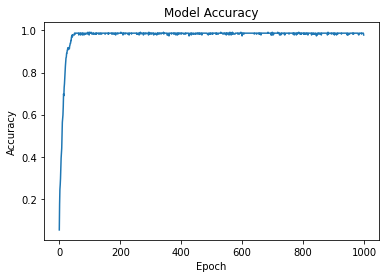

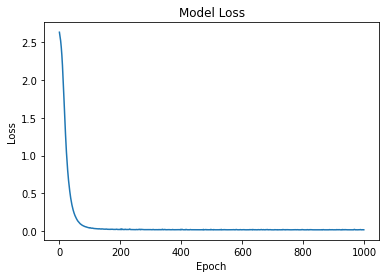

In [11]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [13]:
# Evaluate the model on the training data
predictions = model.predict(input_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20

    accuracy                           0.99       229
   macro avg       0.89      0.93      0.90       229
weighted avg       0.98      0.99      0.98       229



/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Assume your data and labels are loaded and processed already

# Set up 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
all_true_labels = []
all_predicted_labels = []

# Iterate over the folds
for fold, (train_indices, test_indices) in enumerate(kfold.split(input_padded, np.argmax(labels, axis=1))):
    # Build the model
    model = Sequential([
        Embedding(total_words, 16, input_length=input_padded.shape[1]),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(len(data['intents']), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(input_padded[train_indices], labels[train_indices], epochs=100, verbose=0)

    # Evaluate the model on the test data for this fold
    predictions = model.predict(input_padded[test_indices])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels[test_indices], axis=1)

    # Append true and predicted labels for later analysis
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)

    # Print classification report for each fold
    print(f"\nClassification Report - Fold {fold + 1}:\n")
    print(classification_report(true_labels, predicted_labels))

# Print overall classification report
print("\nOverall Classification Report:\n")
print(classification_report(all_true_labels, all_predicted_labels))


/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,



Classification Report - Fold 1:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.75      0.75      0.75         4
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         4
           7       0.80      1.00      0.89         4
           8       0.80      1.00      0.89         4
           9       0.50      0.75      0.60         4
          10       0.75      0.75      0.75         4
          11       0.50      0.50      0.50         4
          12       1.00      0.75      0.86         4
          13       1.00      0.75      0.86         4

    accuracy                           0.74        46
   macro avg       0.67      0.65      0.66        46
weighted avg       0.76      0.74      0.74        46


Classification Report - Fold 2:

           

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 3:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.57      1.00      0.73         4
           4       0.75      0.75      0.75         4
           5       0.67      1.00      0.80         4
           6       0.75      0.75      0.75         4
           7       0.67      0.50      0.57         4
           8       1.00      0.75      0.86         4
           9       1.00      0.25      0.40         4
          10       1.00      0.50      0.67         4
          11       0.57      1.00      0.73         4
          12       0.75      0.75      0.75         4
          13       0.75      0.75      0.75         4

    accuracy                           0.70        46
   macro avg       0.61      0.57      0.55        46
weighted avg       0.74      0.70      0.67   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 4:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.67      0.50      0.57         4
           4       0.75      0.75      0.75         4
           5       0.80      1.00      0.89         4
           6       1.00      0.50      0.67         4
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      0.75      0.86         4
          11       0.57      1.00      0.73         4
          12       1.00      0.75      0.86         4
          13       0.75      0.75      0.75         4

    accuracy                           0.78        46
   macro avg       0.67      0.64      0.64        46
weighted avg       0.81      0.78      0.78   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 5:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.75      0.75      0.75         4
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         4
           6       1.00      0.25      0.40         4
           7       0.50      1.00      0.67         4
           8       1.00      0.75      0.86         4
           9       0.80      1.00      0.89         4
          10       1.00      0.75      0.86         4
          11       0.67      1.00      0.80         4
          12       1.00      1.00      1.00         4
          13       1.00      0.75      0.86         4

    accuracy                           0.80        45
   macro avg       0.75      0.69      0.69        45
weighted avg       0.86      0.80      0.79        45


Overall Classification Report:

            

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm

In [15]:
#testing code on single sentence

In [16]:

# Test the model with user input
# Test the model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction
    prediction = model.predict(user_input_padded)
    

    # Get the predicted tag
    predicted_tag = index_to_tag[tf.argmax(prediction[0]).numpy()]  # Convert to numpy array
    print("the tag predicted is",predicted_tag)

    # Get a random response for the predicted tag
    response = data['intents'][tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response[0])



You: How do I add or remove services from my plan?
the tag predicted is add_remove_services
Chatbot: Yes, you can add or remove services from your plan by logging into your account and navigating to the plan customization section.


KeyboardInterrupt: Interrupted by user

In [17]:
import pickle

In [18]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [19]:
tokenizer

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import json
import pickle

# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)

# ... (rest of your code)

# Save the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tag_to_index.pickle', 'wb') as handle:
    pickle.dump(tag_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_tag.pickle', 'wb') as handle:
    pickle.dump(index_to_tag, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
model.save('chatbot_model.h5')

# Loading the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

with open('tag_to_index.pickle', 'rb') as handle:
    loaded_tag_to_index = pickle.load(handle)

with open('index_to_tag.pickle', 'rb') as handle:
    loaded_index_to_tag = pickle.load(handle)

# Load the model
loaded_model = tf.keras.models.load_model('chatbot_model.h5')

# Test the loaded model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input using the loaded tokenizer
    user_input_sequence = loaded_tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(user_input_padded)
    print(prediction)

    # Get the predicted tag using the loaded mapping dictionaries
    predicted_tag = loaded_index_to_tag[tf.argmax(prediction[0]).numpy()]

    # Get a random response for the predicted tag
    response = data['intents'][loaded_tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response)


You: How do I add or remove services from my plan?
[[5.8059031e-06 4.8958708e-04 4.0954680e-04 9.4626856e-05 2.5741941e-05
  2.0776715e-03 1.0628434e-06 1.5566806e-06 9.9674135e-01 7.8554804e-05
  6.7835172e-06 6.4888201e-07 5.6785997e-05 1.0296151e-05]]
Chatbot: ['Yes, you can add or remove services from your plan by logging into your account and navigating to the plan customization section.', 'To customize your plan, log in to your account and go to the plan management page where you can add or remove services.', 'You can modify your plan by adding or removing services through your account settings. Simply log in and navigate to the plan customization section.', 'To add or remove services from your plan, log in to your account and access the plan customization option.', 'Yes, you can add or remove services from your plan by logging into your account and selecting the option to customize your plan.', 'To customize your plan, log in to your account and go to the plan management page wh

KeyboardInterrupt: Interrupted by user